create batch generator

In [1]:
import h5py
import numpy as np
import random

def data_generator(h5_dataset_path, batch_size):
    with h5py.File(h5_dataset_path, 'r') as f:
        num_samples = f['images'].shape[0]
        num_batches = int(np.ceil(num_samples / batch_size))
        
        while True:  # 生成器需要无限循环
            index_list = list(range(num_batches))
            random.shuffle(index_list)
            for i in index_list:
                start_index = i * batch_size
                end_index = min((i + 1) * batch_size, num_samples)

                batch_images = f['images'][start_index:end_index]
                batch_labels = f['labels'][start_index:end_index]
                
                yield batch_images, batch_labels

Display dataset

In [2]:
import matplotlib.pyplot as plt

def checkout_and_display_dataset(batch_images, batch_labels):
    """
    显示图像，并同时打印处理后的标签和原始标签。
    Args:
        images: 图像数据
        processed_labels: one-hot 编码形式的标签
        original_labels: 原始标签数据
        num_digits: 每张图像的数字数量
    """
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(batch_images[i], cmap='gray')
        plt.axis('off')
        
        original_labels = [np.argmax(pred) for pred in batch_labels[i]]
        original_digits = ''.join([str(original_labels[j]) for j in range(2)])
    
        plt.title(f'Original: {original_digits}')
    plt.show()

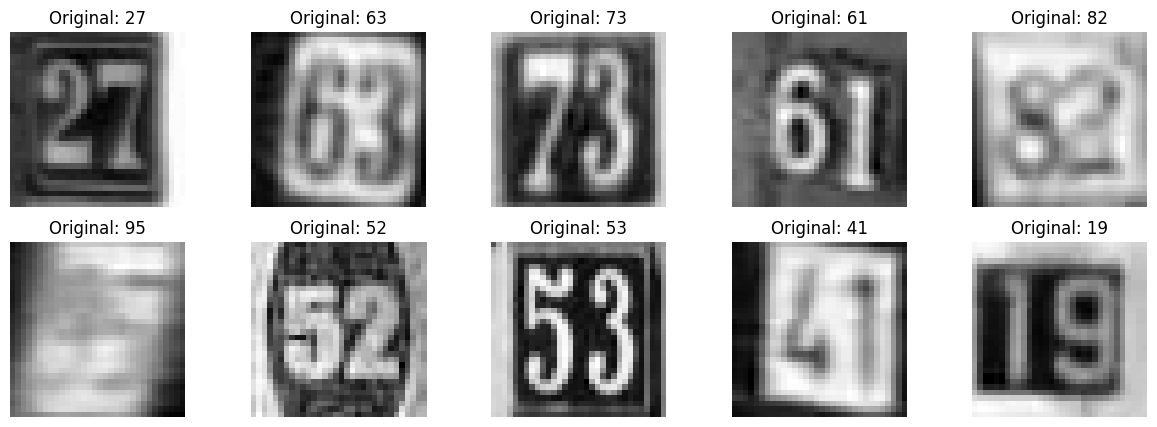

In [4]:
batch_size = 10

for batch_images, batch_labels in data_generator('svhn_dataset/svhn_2digits_train.h5', batch_size):
    checkout_and_display_dataset(batch_images, batch_labels)
    break